In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
print('Training Data Shape    : ', x_train.shape)
print('Training Labels  Shape : ', y_train.shape)
print('Testing Data Shape     : ', x_test.shape)
print('Testing Labels Shape   : ', y_test.shape)

Training Data Shape    :  (60000, 28, 28)
Training Labels  Shape :  (60000,)
Testing Data Shape     :  (10000, 28, 28)
Testing Labels Shape   :  (10000,)


(-0.5, 27.5, 27.5, -0.5)

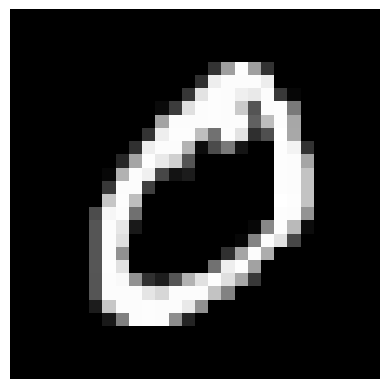

In [ ]:
plt.imshow(x_train[1], cmap = 'gray')
plt.axis('off')

In [ ]:
np.set_printoptions(linewidth = 300)
print(x_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 18

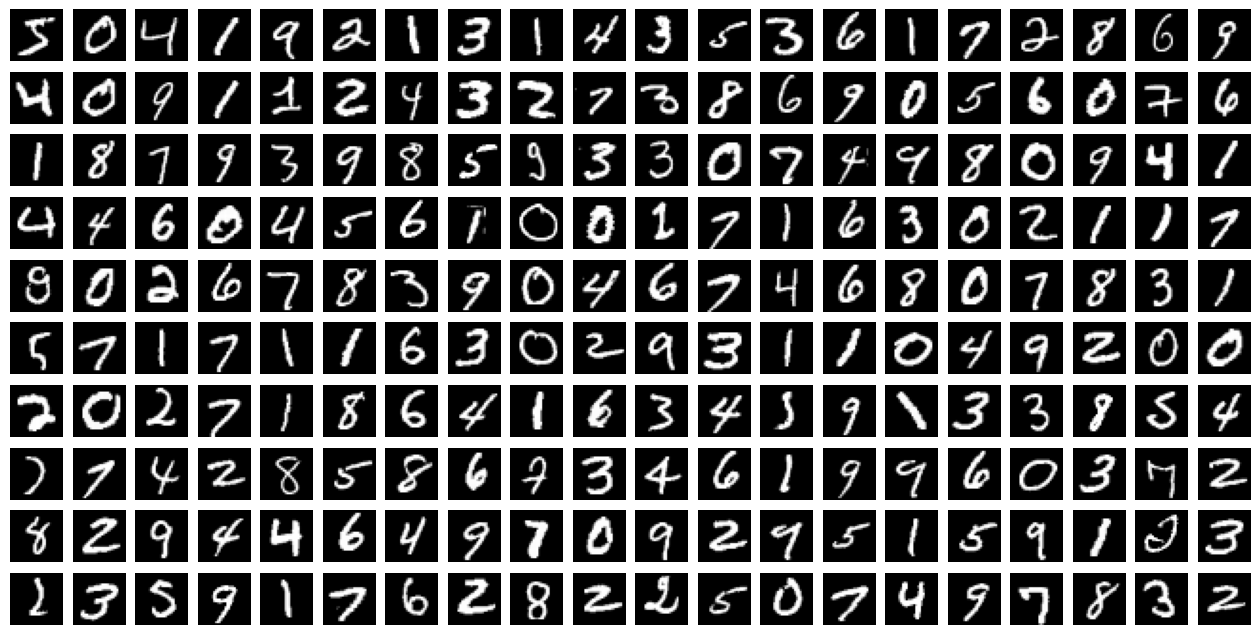

In [ ]:
plt.figure(figsize = (16,8))
for i in range(200):
  plt.subplot(10,20, i+1)
  plt.imshow(x_train[i], cmap = 'gray')
  plt.axis('off')

In [ ]:
# Encoding the labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_test  = to_categorical(y_test, num_classes = 10)

In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_test  = x_test.reshape(10000,28,28,1)

In [ ]:
print('Training Data Shape    : ', x_train.shape)
print('Training Labels  Shape : ', y_train.shape)
print('Testing Data Shape     : ', x_test.shape)
print('Testing Labels Shape   : ', y_test.shape)

Training Data Shape    :  (60000, 28, 28, 1)
Training Labels  Shape :  (60000, 10)
Testing Data Shape     :  (10000, 28, 28, 1)
Testing Labels Shape   :  (10000, 10)


In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    rotation_range = 10,
    # zoom_range = 10,
    # horizontal_flip = True,
    # vertical_flip = True,
    # shear_range = 10
)
train_datagen.fit(x_train)
train_generator = train_datagen.flow(x_train, y_train, batch_size = 1000)

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1/255)
val_datagen.fit(x_test)
val_generator = val_datagen.flow(x_test, y_test)

# Steps to create and train a neural network
1. Create the architecture
2. Compile the model
3. Fit the model

In [ ]:
# Creating the architecture


model = tf.keras.models.Sequential()
model.add(Conv2D(16, (3,3), activation = 'relu', padding = 'valid', input_shape = (28,28,1)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 100)               8

In [ ]:
# Compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(),
              metrics = ['accuracy'])

In [ ]:
# Fit the model
history = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 50,
    batch_size = 1000,
    verbose = 1
)

Epoch 1/50
60/60 [==============================] - 20s 277ms/step - loss: 2.2921 - accuracy: 0.1209 - val_loss: 2.2670 - val_accuracy: 0.1745
Epoch 2/50
60/60 [==============================] - 18s 293ms/step - loss: 2.2616 - accuracy: 0.2063 - val_loss: 2.2126 - val_accuracy: 0.3241
Epoch 3/50
60/60 [==============================] - 17s 281ms/step - loss: 2.2105 - accuracy: 0.3095 - val_loss: 2.1058 - val_accuracy: 0.5157
Epoch 4/50
60/60 [==============================] - 18s 294ms/step - loss: 2.0988 - accuracy: 0.4182 - val_loss: 1.8501 - val_accuracy: 0.6421
Epoch 5/50
60/60 [==============================] - 17s 287ms/step - loss: 1.8229 - accuracy: 0.5258 - val_loss: 1.3116 - val_accuracy: 0.7157
Epoch 6/50
60/60 [==============================] - 17s 281ms/step - loss: 1.4317 - accuracy: 0.5823 - val_loss: 0.8721 - val_accuracy: 0.7678
Epoch 7/50
60/60 [==============================] - 17s 282ms/step - loss: 1.2043 - accuracy: 0.6242 - val_loss: 0.6858 - val_accuracy: 0.8118

## Visualizing the training journey

In [ ]:
type(history.history)

dict

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc_train = history.history['accuracy']
acc_val   = history.history['val_accuracy']

loss_train = history.history['loss']
loss_val   = history.history['val_loss']

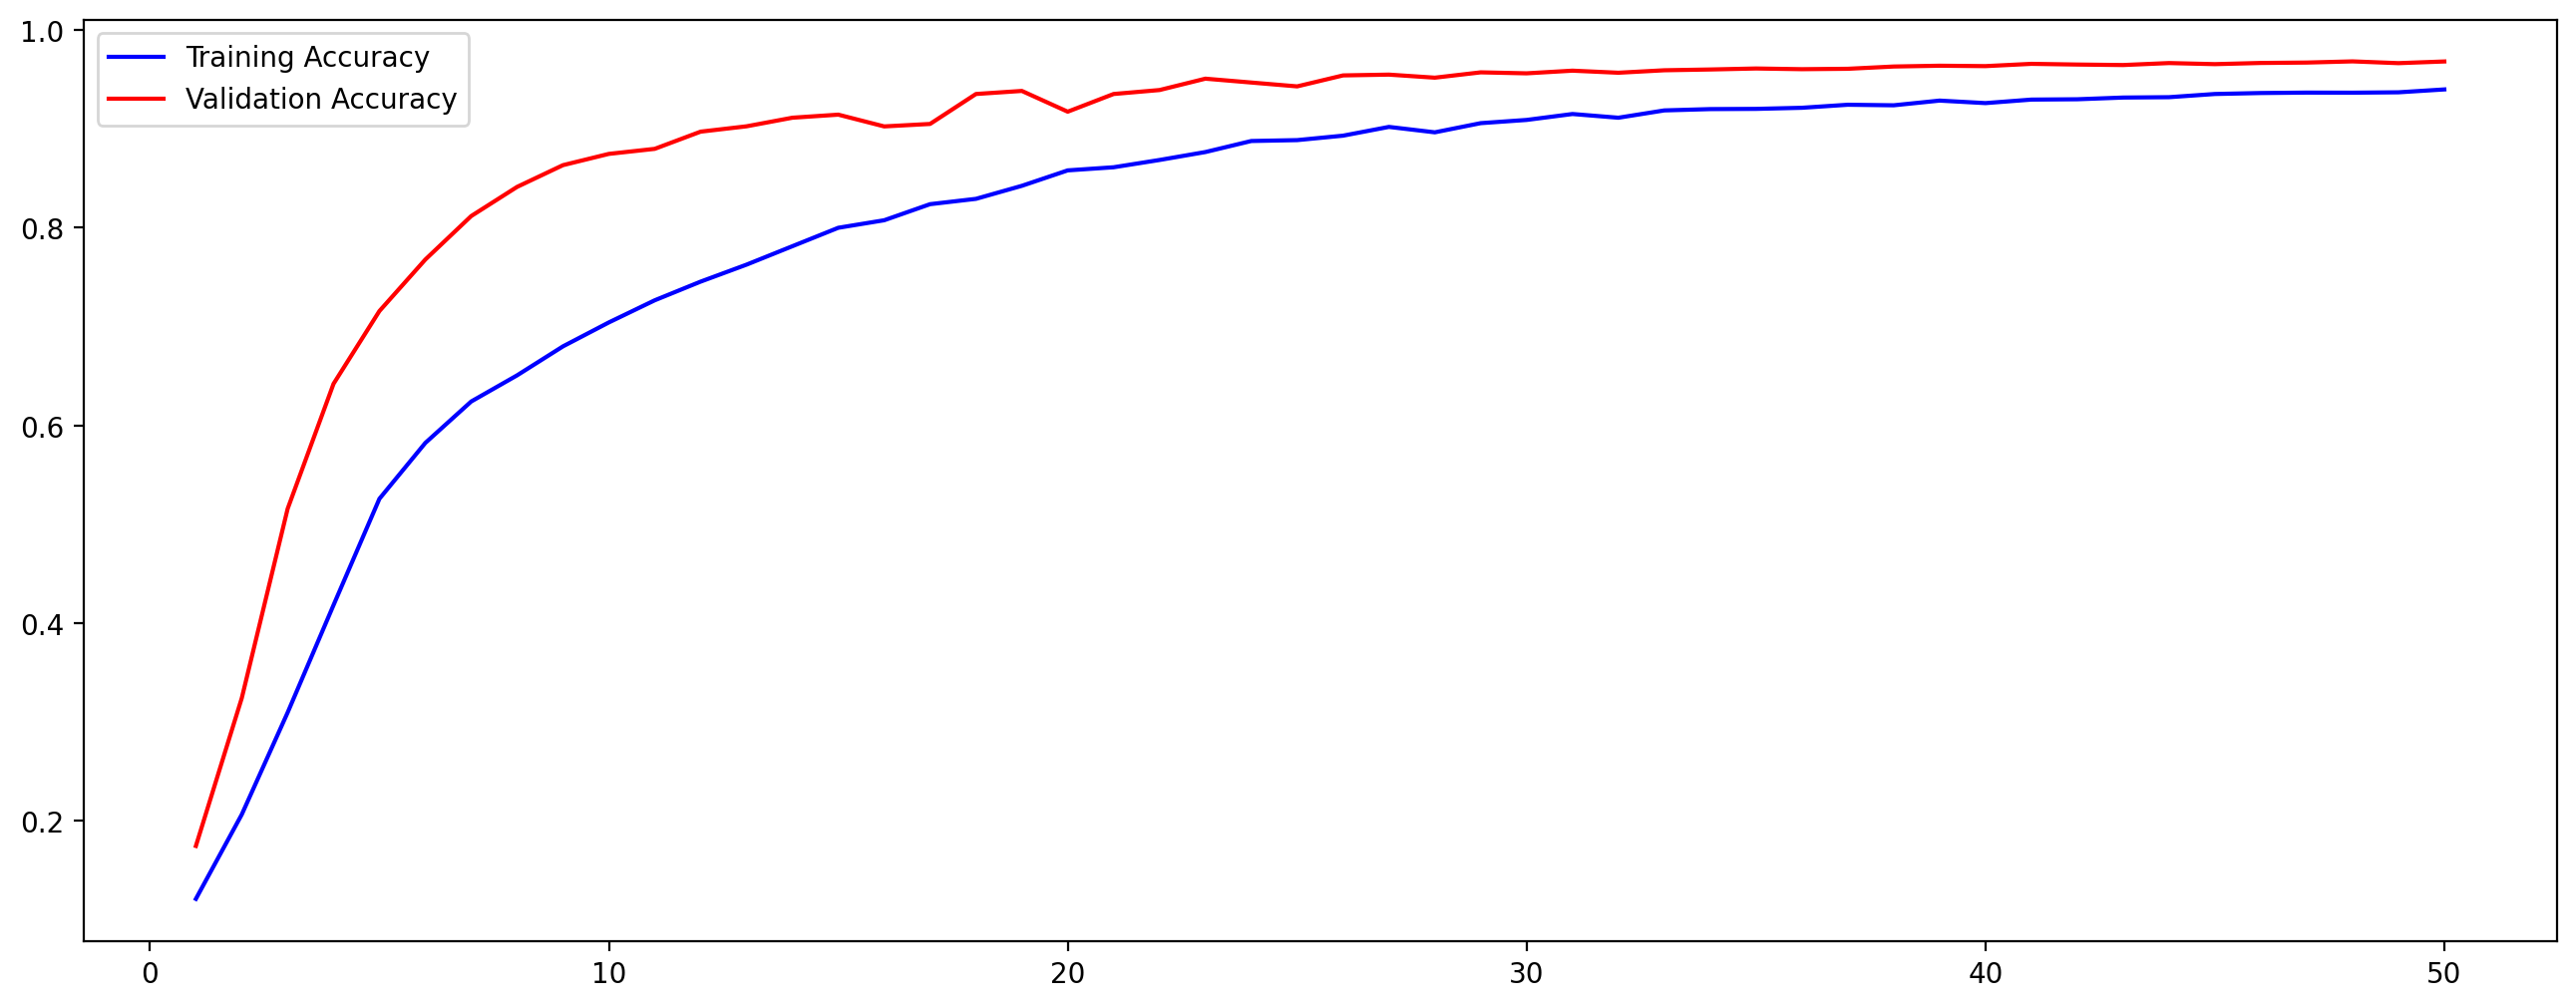

In [ ]:
num_epochs = range(1,51)
plt.figure(figsize = (16,6), dpi = 200)
plt.plot(num_epochs, acc_train, c = 'blue', label = 'Training Accuracy')
plt.plot(num_epochs, acc_val, c = 'red', label = 'Validation Accuracy')
plt.legend()

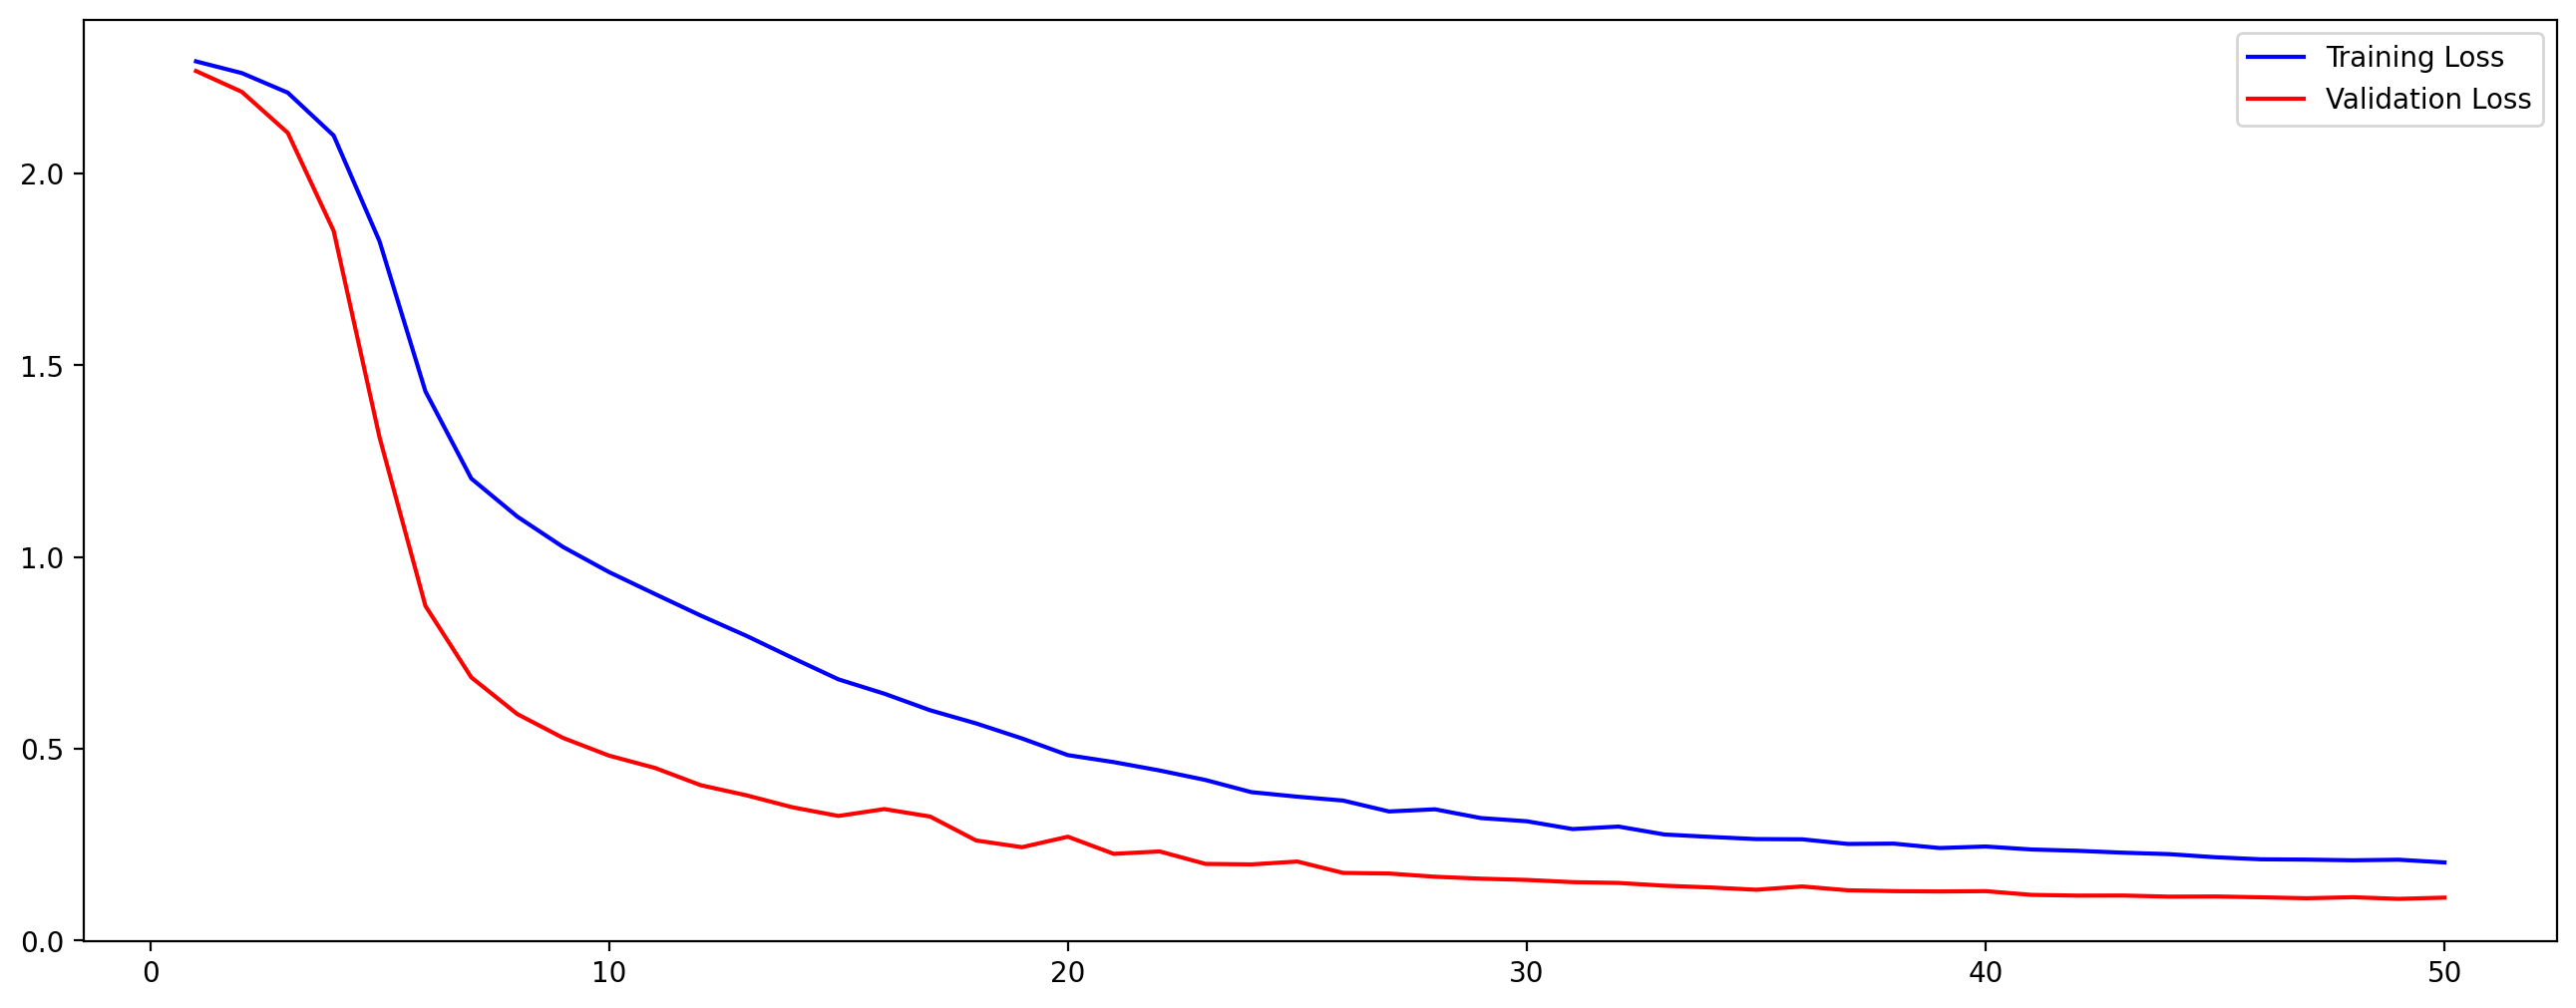

In [ ]:
num_epochs = range(1,51)
plt.figure(figsize = (16,6), dpi = 200)
plt.plot(num_epochs, loss_train, c = 'blue', label = 'Training Loss')
plt.plot(num_epochs, loss_val, c = 'red', label = 'Validation Loss')
plt.legend()

# Making Predictions

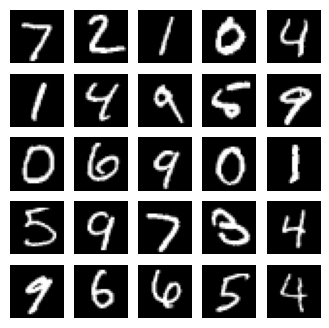

In [ ]:
plt.figure(figsize = (4,4))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.imshow(x_test[i], cmap = 'gray')
  plt.axis('off')

In [ ]:
model.predict(x_test[1:2])

1/1 [==============================] - 0s 24ms/step


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
np.argmax(model.predict(x_test[1:2]))

1/1 [==============================] - 0s 25ms/step


2

In [ ]:
def predict_digit(x):
  digit = model.predict(x)
  digit = np.argmax(digit)
  print('The digit is the given iamge is : ', digit)

In [ ]:
predict_digit(x_test[0:1])

1/1 [==============================] - 0s 17ms/step
The digit is the given iamge is :  7
